# Ejercicio 2 de percolación

In [2]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.optimize import curve_fit

[ 53.79136835 -34.54707686] 
 [[ 32.25071402 -19.22012259]
 [-19.22012259  11.48732208]]


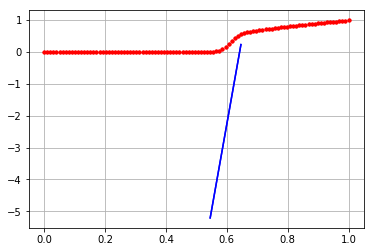

In [4]:
data = np.genfromtxt('intensidades.txt', delimiter = '\t')
p = np.linspace(0,1,len(data))
logdata = np.log(data[54:65])



g = lambda x, a, b: a*x+b
popt, pcov = curve_fit(g, p[54:65],logdata, p0 = [0.14, 0])
print(popt, '\n', pcov)
plt.plot(p, data, 'r.', label = 'Datos')
plt.plot(p[54:65], g(p[54:65], popt[0], popt[1]), 'b-', label = 'Ajuste')
plt.grid(True)
plt.show()

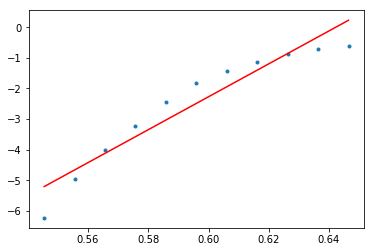

In [8]:
plt.plot(p[54:65], logdata, '.')
plt.plot(p[54:65], g(p[54:65], popt[0], popt[1]), 'r')
#plt.yscale('log')

plt.show()

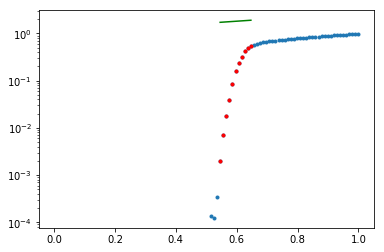

In [10]:
plt.plot(p, data, '.')
plt.plot(p[54:65],data[54:65], 'r.' )
plt.plot(p[54:65], np.exp(1*p[54:65]), 'g-')
plt.yscale('log')
plt.show()

/home/josue/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:10: RuntimeWarning: invalid value encountered in power


[ 0.24555298  0.61191387  1.23096014] 
 [[  2.59326196e-04  -1.48924902e-05   8.46001393e-04]
 [ -1.48924902e-05   1.08832523e-06  -4.63872387e-05]
 [  8.46001393e-04  -4.63872387e-05   2.81966087e-03]]


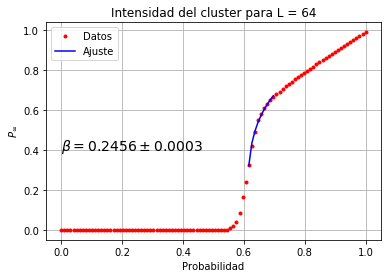

In [51]:
from matplotlib import rc
plt.close()
data = np.genfromtxt('intensidades.txt', delimiter = '\t')
p = np.linspace(0,1,len(data))
logdata = np.log(data[54:65])

i=61
f=70

g = lambda p, t, pc, a: a*(p-pc)**t
popt, pcov = curve_fit(g, p[i:f],data[i:f], p0 = [0.14, 0.5, 1])
print(popt, '\n', pcov)
plt.plot(p, data, 'r.', label = 'Datos')
plt.plot(p[i:f], g(p[i:f], popt[0], popt[1], popt[2]), 'b-', label = 'Ajuste')
plt.legend(loc = 'best')
plt.title('Intensidad del cluster para L = 64')
plt.xlabel('Probabilidad')
plt.ylabel(r'$P_\infty$')
plt.text(0.0,0.4,r'$\beta = %.4f \pm %.4f$'%(popt[0], pcov[0,0]), fontsize = 14)
plt.grid(True)
plt.savefig('beta.png', format = 'png', dpi = 200)
plt.show()